# Loan Default Prediction - Complete Pipeline with Logistic Regression


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

## 2. Load Dataset


In [3]:
df = pd.read_csv("/content/loan.csv")  # Ensure the file is in the same directory
print("Initial Dataset Shape:", df.shape)

Initial Dataset Shape: (614, 13)


## 3. Data Overview


In [4]:
print(df.head())
print(df.info())
print("Missing Values:\n", df.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

## 4. Fill Missing Values


In [5]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Drop rows with any remaining nulls (optional)
df.dropna(inplace=True)


<ipython-input-5-7e1313075e03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
<ipython-input-5-7e1313075e03>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

## 5. Clean and Encode 'Dependents' Column


In [6]:
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


## 6. Drop unnecessary columns


In [8]:
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)


## 7. Encode Categorical Features

In [9]:
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


## 8. Feature Scaling


In [10]:
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)


## 9. EDA and Visualization

### Correlation Heatmap


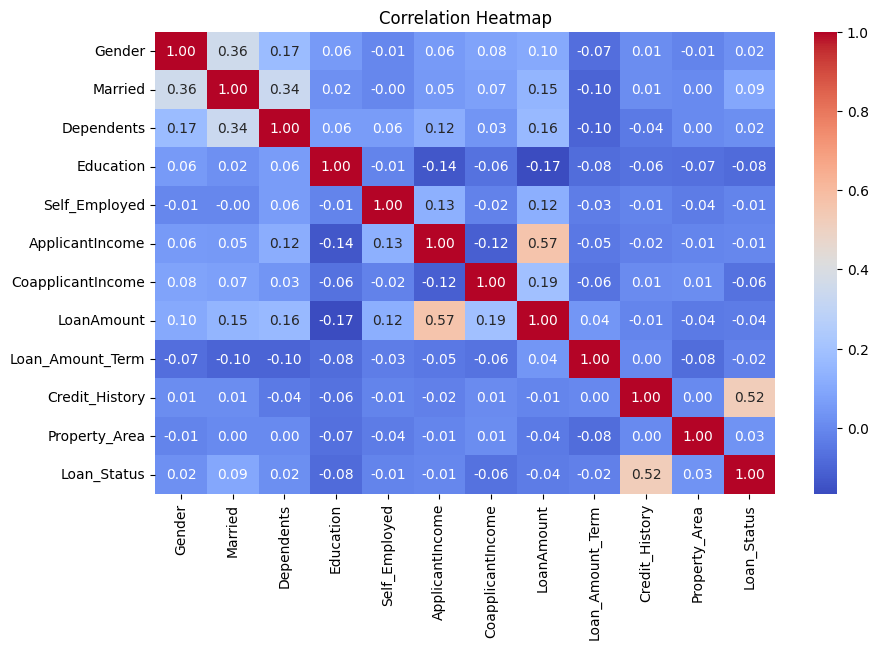

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Loan Status Distribution


<ipython-input-12-e4f6b2c8bf89>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='Set2')


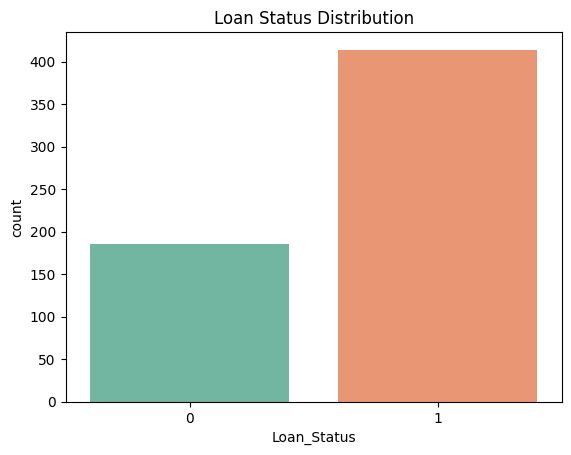

In [12]:
sns.countplot(data=df, x='Loan_Status', palette='Set2')
plt.title("Loan Status Distribution")
plt.show()


### LoanAmount Distribution


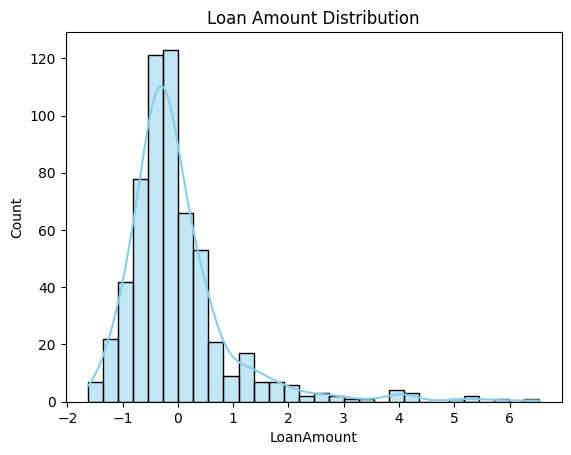

In [13]:
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='skyblue')
plt.title("Loan Amount Distribution")
plt.show()

### Applicant Income vs Loan Amount


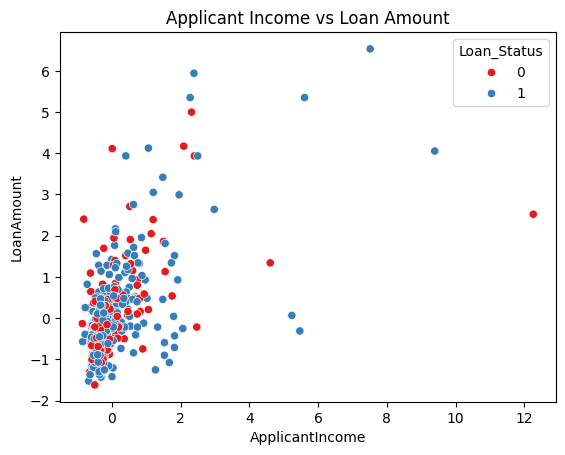

In [14]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', palette='Set1')
plt.title("Applicant Income vs Loan Amount")
plt.show()


## 10. Prepare Features and Target

In [15]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


## 11. Train/Test Split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 12. Train Logistic Regression Model


In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 13. Predictions


In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


## 14. Evaluation Metrics


In [19]:
print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))



--- Model Evaluation ---
Accuracy Score: 0.7916666666666666
Confusion Matrix:
 [[14 22]
 [ 3 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.39      0.53        36
           1       0.79      0.96      0.87        84

    accuracy                           0.79       120
   macro avg       0.80      0.68      0.70       120
weighted avg       0.80      0.79      0.76       120

ROC AUC Score: 0.6712962962962963


## 15. ROC Curve


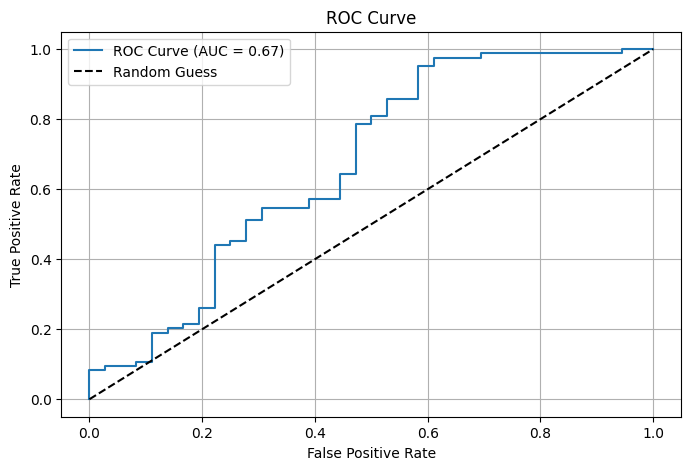

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
